In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [2]:
image = cv2.imread('image.jpg',cv2.IMREAD_GRAYSCALE)

In [3]:
def show_img(image):
    if image is not None:
        cv2.imshow('Image',image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print('error in diplaying image')

def transform_image(image,kernel):
    t_image = cv2.filter2D(image,-1,kernel)
    return t_image

def plot_img(img_list,img_titles):
    n = len(img_list)
    plt.figure(figsize=(7,n*2))
    for i in range(n):
        plt.subplot(n//2+1,2,i+1)
        plt.title(img_titles[i])
        plt.imshow(img_list[i],cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## Point Detection

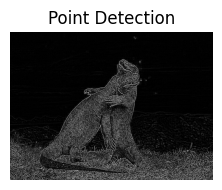

In [4]:
point_mask = np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1]])
point_img = transform_image(image,point_mask)
plot_img([point_img],['Point Detection'])

## Line Detection

### Horizontal

In [5]:
h_line_mask = np.array([[-1,-1,-1],
                        [2,2,2],
                        [-1,-1,-1]])
h_line_img = transform_image(image,h_line_mask)

### Vertical

In [6]:
v_line_mask = np.array([[-1,2,-1],
                        [-1,2,-1],
                        [-1,2,-1]])
v_line_img = transform_image(image,v_line_mask)

### +45 Deg

In [7]:
pos_45_mask = np.array([[-1,-1,2],
                        [-1,2,-1],
                        [2,-1,-1]])
pos_45_img = transform_image(image,pos_45_mask)

### -45 Deg

In [8]:
neg_45_mask = np.array([[2,-1,-1],
                        [-1,2,-1],
                        [-1,-1,2]])
neg_45_img = transform_image(image,neg_45_mask)

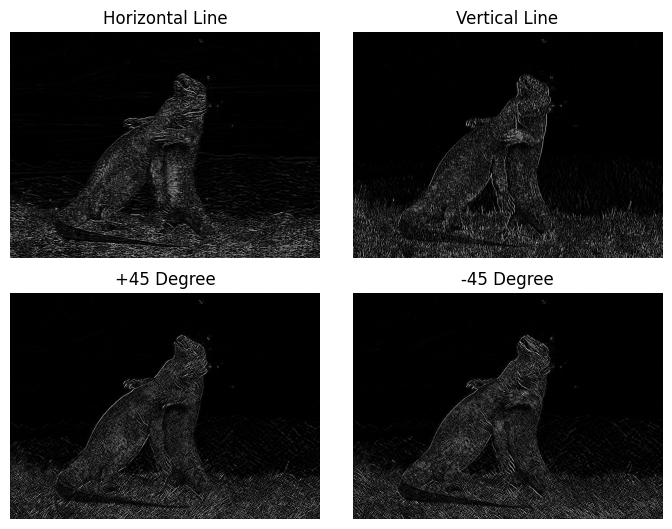

In [9]:
plot_img([h_line_img,v_line_img,pos_45_img,neg_45_img],['Horizontal Line','Vertical Line','+45 Degree','-45 Degree'])

## Edge Detection

### Sobel

In [10]:
sobel_x = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

sobel_y = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])

s_x_img = transform_image(image,sobel_x)
s_y_img = transform_image(image,sobel_y)

### Prewitt

In [11]:
prewitt_x = np.array([[-1,0,1],
                   [-1,0,1],
                   [-1,0,1]])

prewitt_y = np.array([[-1,-1,-1],
                   [0,0,0],
                   [1,1,1]])

p_x_img = transform_image(image,prewitt_x)
p_y_img = transform_image(image,prewitt_y)

### Robert

In [12]:
robert_x = np.array([[1,0],
                     [0,-1]])

robert_y = np.array([[0,1],
                     [-1,0]])

r_x_img = transform_image(image,robert_x)
r_y_img = transform_image(image,robert_x)

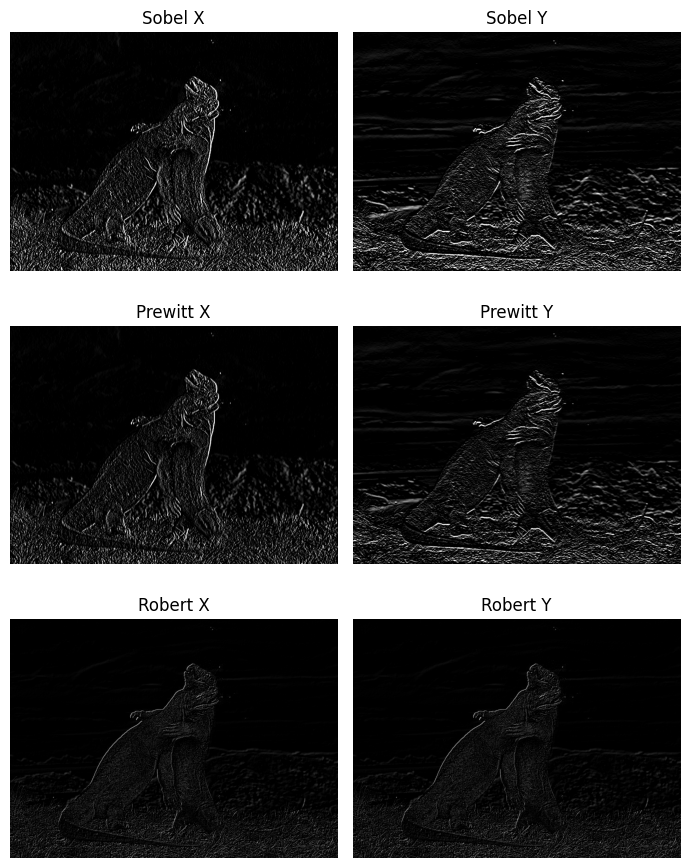

In [13]:
plot_img([s_x_img,s_y_img,p_x_img,p_y_img,r_x_img,r_y_img],['Sobel X','Sobel Y','Prewitt X','Prewitt Y','Robert X','Robert Y'])